In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

In [86]:
num_features = 32
sequence_length = 32

#Inicializamos la CNN
classifier = Sequential()

#Convolutional layer
# 32 features detectors of 3x3 kernels
classifier.add(Convolution2D(32,3,3,input_shape=(sequence_length,num_features,1), activation = 'relu' ))
#Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))


#Flattening
classifier.add(Flatten())
#Fully connected layer
#Hay que experimentar con el numero de nodos (puede que 128 vaya mejor)
classifier.add(Dense(64,activation = 'relu'))
#Para dos outputs distintos usamos sigmoid pero para mas de dos tendriamos que usar softmax
classifier.add(Dense(1,activation = 'softmax'))

#Compiling the CNN
#Con mas de dos clases tendriamos que elegir categorical_crossentropy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

directory = '../rpi/dataset/'

#https://keras.io/api/data_loading/timeseries/
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=["lumos", "revelio","leviosa"],
    color_mode="grayscale",
    batch_size=32,
    image_size=(32, 32),
    shuffle=True,
    seed=123423,
    #Quizas cambiar esto para ajustar a numero de imagen(default .2)
    validation_split=0.2,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


classifier.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

classifier.summary()

Found 300 files belonging to 3 classes.
Using 240 files for training.
Using 60 files for validation.
0.098590694 0.959804
Epoch 1/50
8/8 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
E

Epoch 1/15
8/8 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 2/15
8/8 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 3/15
8/8 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 4/15
8/8 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 5/15
8/8 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 6/15
8/8 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 - val_accuracy: 0.3000
Epoch 7/15
8/8 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3417 - val_loss: 0.0000e+00 -

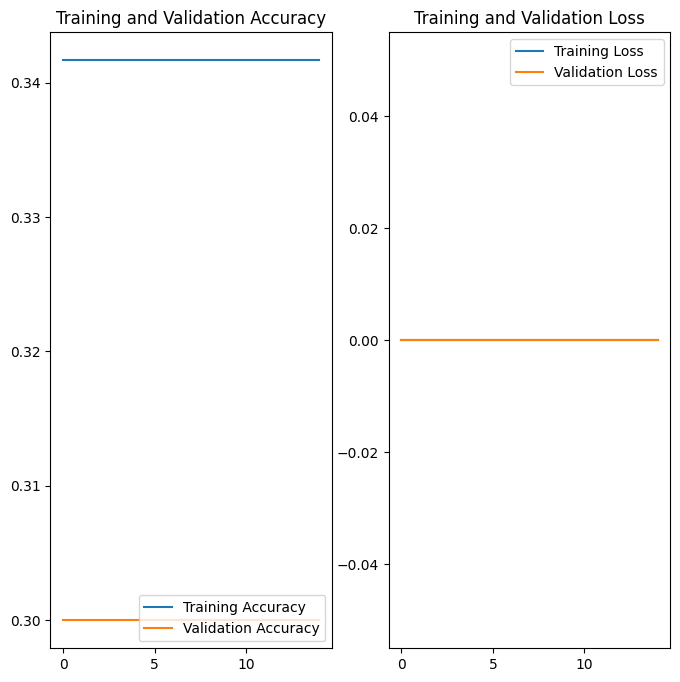

In [74]:
epochs = 15
history = classifier.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [75]:
img = tf.keras.utils.load_img(
    '../rpi/test/revelio3.jpeg',
    color_mode="grayscale",
    target_size=(20,6),
    interpolation="nearest",
    keep_aspect_ratio=True,
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

class_names = train_ds.class_names

predictions = classifier.predict(img_array)
print(predictions[:5])

np.argmax(predictions[0])



1/1 [==============================] - 0s 53ms/step
[[1.]]


0

In [50]:
#Guardamos el modelo

classifier.save('./classifier')

INFO:tensorflow:Assets written to: ./classifier\assets


INFO:tensorflow:Assets written to: ./classifier\assets
